# Part 1:

## Fashion-MNIST Classification:

## Loading libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers
import keras
from keras import backend as K
from tensorflow.keras.datasets import mnist
from __future__ import print_function
# from tensorflow.keras.optimizers import RMSprop
from time import time
import numpy as np

Using TensorFlow backend.


## Uploading the fashion mnist dataset which was split into train and test data before hand

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Looking at the shape of the train and test data

In [3]:
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Assigning number of rows and columns to variables for further use


In [4]:
n_rows = trainX.shape[1]
n_cols = trainX.shape[2]

## Description of the labels

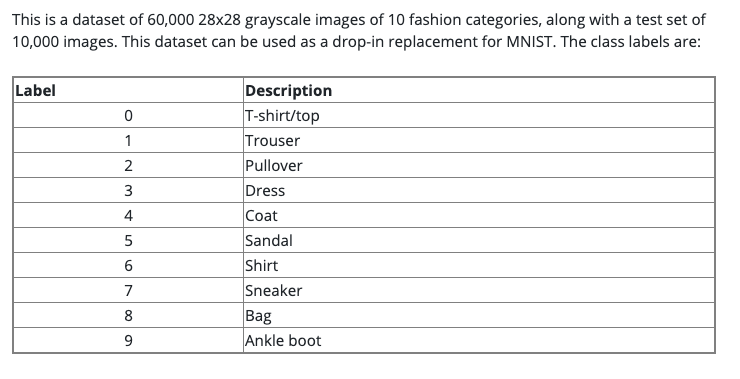

## Creating a dictionary which corresponds to the label and its name.

In [5]:
label_mapping = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
num_classes = len(label_mapping)

## Visualizing random sample from traning data with its corresponding label

([], <a list of 0 Text major ticklabel objects>)

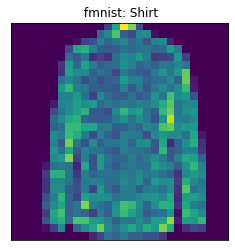

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(trainX[104] )
plt.title(" fmnist: " + label_mapping[trainy[104]])
plt.xticks([])
plt.yticks([])

## Visulaizing the images in gray scale

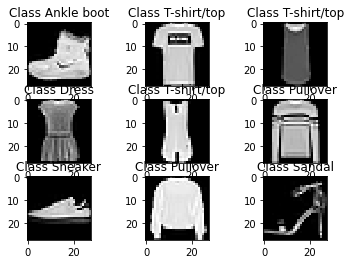

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(trainX[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(label_mapping[trainy[i]]))

## Normalising and reshaping the dataset

In [8]:
trainX = trainX.reshape(trainX.shape[0], n_rows, n_cols, 1)
testX = testX.reshape(testX.shape[0], n_rows, n_cols, 1)
input_shape = (n_rows, n_cols, 1)

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255
print('x_train shape:', trainX.shape)
print('x_test shape:', testX.shape)

print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## One-hot Encoding

In [9]:
trainy = tf.keras.utils.to_categorical(trainy, num_classes)
testy = tf.keras.utils.to_categorical(testy, num_classes)

In [10]:
np.where(trainy[1234] == 1)[0][0]

8

## Building a ConvNet with at least 3 convolutional layers.

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [14]:
batch_size = 128
epochs = 64

In [15]:

history = model.fit(trainX, trainy,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(testX, testy))


Epoch 1/64
469/469 [==============================] - 3s 7ms/step - loss: 2.2588 - accuracy: 0.1975 - val_loss: 2.1890 - val_accuracy: 0.3385
Epoch 2/64
469/469 [==============================] - 3s 6ms/step - loss: 2.1241 - accuracy: 0.3659 - val_loss: 2.0261 - val_accuracy: 0.4680
Epoch 3/64
469/469 [==============================] - 3s 6ms/step - loss: 1.9319 - accuracy: 0.4689 - val_loss: 1.7851 - val_accuracy: 0.5701
Epoch 4/64
469/469 [==============================] - 3s 6ms/step - loss: 1.6698 - accuracy: 0.5344 - val_loss: 1.4924 - val_accuracy: 0.5975
Epoch 5/64
469/469 [==============================] - 3s 6ms/step - loss: 1.4161 - accuracy: 0.5631 - val_loss: 1.2520 - val_accuracy: 0.6247
Epoch 6/64
469/469 [==============================] - 3s 6ms/step - loss: 1.2347 - accuracy: 0.5859 - val_loss: 1.0973 - val_accuracy: 0.6412
Epoch 7/64
469/469 [==============================] - 3s 6ms/step - loss: 1.1239 - accuracy: 0.6028 - val_loss: 1.0000 - val_accuracy: 0.6577
Epoch 

In [16]:
score = model.evaluate(testX, testy, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5242271423339844
Test accuracy: 0.8169999718666077


We can observe that the Test accuracy getting stable at 81.5%

## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model.predict_classes(testX)

cm = confusion_matrix(np.argmax(testy, axis=1), test_predictions)
print(cm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[827   5  14  55   5   4  74   0  16   0]
 [  2 931   8  37  12   0   8   0   2   0]
 [ 13   3 697  11 162   1  99   0  14   0]
 [ 27  15  11 856  34   2  51   0   4   0]
 [  0   3 114  45 740   2  88   0   8   0]
 [  0   0   0   1   0 906   0  59   4  30]
 [213   2 173  37 127   2 418   0  28   0]
 [  0   0   0   0   0  34   0 909   0  57]
 [  4   2   7  10   4   4  12   5 950   2]
 [  0   0   0   0   0  14   0  49   1 936]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Accuracy Score: 0.8169999718666077')

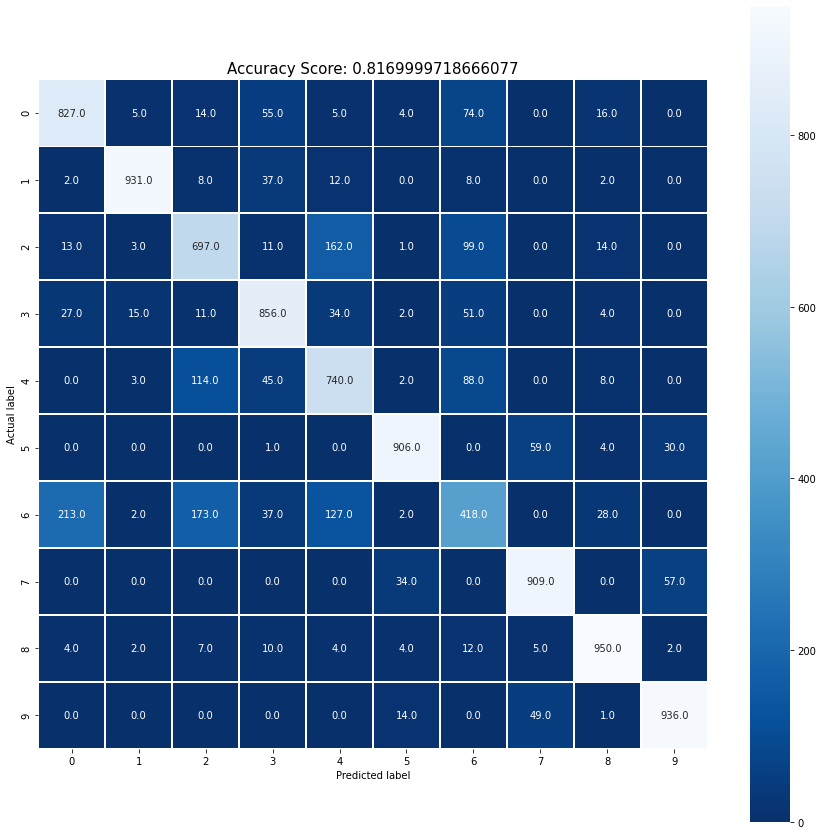

In [18]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15)

## Checking the predicted labels with the true labels.

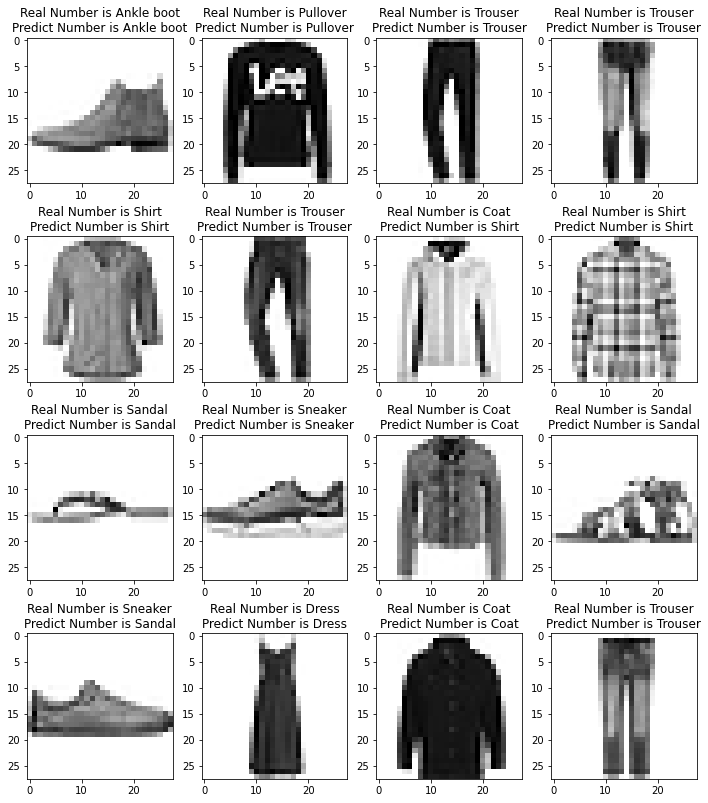

In [19]:
y_pred = model.predict(testX)
x_test__ = testX.reshape(testX.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {label_mapping[testy[i].argmax()]}\nPredict Number is {label_mapping[y_pred[i].argmax()]}")

## Train Vs Validation Accuracy

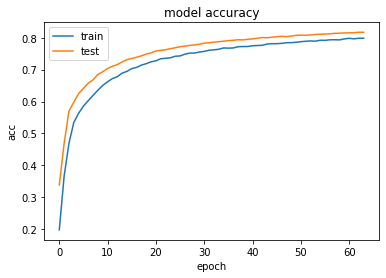

In [20]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting Model Loss over Time

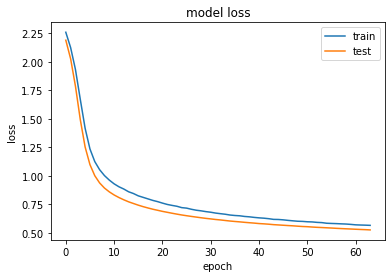

In [21]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

We can observe that test accuracy and training accuracy are increased over time for each epoch. Simialrly, model loss for training and testing had decreased eventually. And clearly, there is no sign of overfitting.


---

## Building an other ConvNet little deeper than previous one.

In [22]:
deep_model = Sequential()

deep_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

deep_model.add(Conv2D(64, (3,3), activation='relu'))
deep_model.add(MaxPooling2D(pool_size=(2,2)))
deep_model.add(Dropout(0.2))
deep_model.add(BatchNormalization())

deep_model.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
# deep_model.add(MaxPooling2D(pool_size=(3,3)))
deep_model.add(Dropout(0.2))
deep_model.add(BatchNormalization())

deep_model.add(Conv2D(256, kernel_size=(3,3),padding="same", activation='relu'))
deep_model.add(MaxPooling2D(pool_size=(3,3)))
deep_model.add(Dropout(0.2))
deep_model.add(BatchNormalization())

deep_model.add(Conv2D(128, (3,3), activation='relu'))


deep_model.add(Flatten())
deep_model.add(Dense(64, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(num_classes, activation='softmax'))

In [23]:
deep_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [24]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 128)      

In [25]:
batch_size = 128
epochs = 64

history1 = deep_model.fit(trainX, trainy,
               batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(testX, testy))


Epoch 1/64
469/469 [==============================] - 6s 12ms/step - loss: 2.3842 - accuracy: 0.1057 - val_loss: 2.3665 - val_accuracy: 0.1611
Epoch 2/64
469/469 [==============================] - 5s 11ms/step - loss: 2.2390 - accuracy: 0.1695 - val_loss: 2.1445 - val_accuracy: 0.2718
Epoch 3/64
469/469 [==============================] - 5s 11ms/step - loss: 2.1095 - accuracy: 0.2420 - val_loss: 2.0071 - val_accuracy: 0.3956
Epoch 4/64
469/469 [==============================] - 5s 11ms/step - loss: 1.9717 - accuracy: 0.3141 - val_loss: 1.8564 - val_accuracy: 0.4641
Epoch 5/64
469/469 [==============================] - 5s 11ms/step - loss: 1.8220 - accuracy: 0.3862 - val_loss: 1.6967 - val_accuracy: 0.5028
Epoch 6/64
469/469 [==============================] - 5s 11ms/step - loss: 1.6675 - accuracy: 0.4498 - val_loss: 1.5436 - val_accuracy: 0.5415
Epoch 7/64
469/469 [==============================] - 5s 11ms/step - loss: 1.5234 - accuracy: 0.5043 - val_loss: 1.4112 - val_accuracy: 0.5708

In [26]:
score1 = deep_model.evaluate(testX, testy, verbose=0)

print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.5250658392906189
Test accuracy: 0.8008000254631042


## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.8008000254631042')

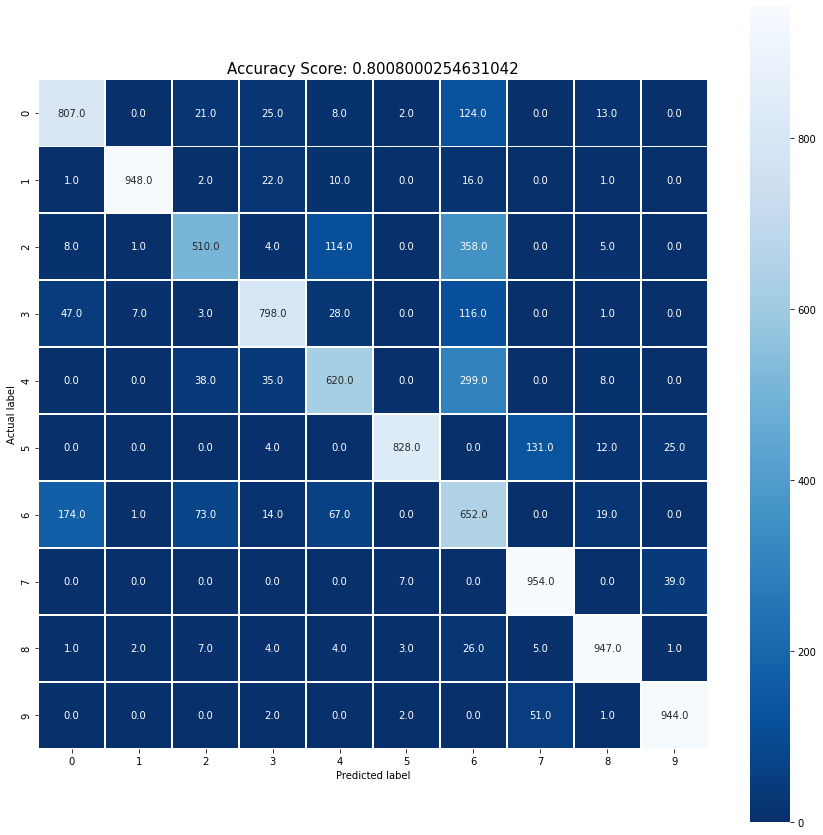

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = deep_model.predict_classes(testX)

cm = confusion_matrix(np.argmax(testy, axis=1), test_predictions)
# print(cm)

import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score1[1])
plt.title(all_sample_title, size = 15)

## Train Vs Validation Accuracy

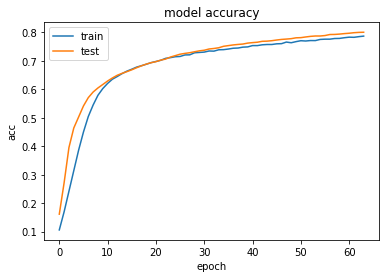

In [30]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Plotting Model Loss over Time

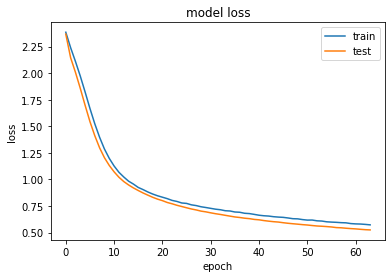

In [31]:
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Observations:

We can observe an increase in the performance of the model when the model was made deep by adding additional convolutional layers. But the difference was not that significant. Model was not able to learn at a greater rate as expected and there is no overfitting visibility (no variance). 
It is a clear case of avoidable bias. For this we can try either Bigger network or different optimizers or increasing training dataset size.  
The most efficient way is to increase the training dataset size by doing data augumentation.